# IEEE-CIS Fraud Detection

In [24]:
# Import necessary modules

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import pickle

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report,  confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [25]:
# Import train data
df = pd.read_pickle('dataset/train_engineered_new.pkl')
test = pd.read_pickle('dataset/test_engineered_new.pkl')

In [9]:
# # Load similar columns list from memory
# with open("dataset/similar_cols.txt", "rb") as cl:   # Unpickling
#     similar_cols = pickle.load(cl)

# list(enumerate(similar_cols))

In [26]:
df.shape

(590540, 110)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 2987000 to 3577539
Columns: 110 entries, TransactionAmt to isFraud
dtypes: float16(78), float32(4), float64(2), int16(1), int8(1), uint8(24)
memory usage: 125.6 MB


In [28]:
df.head()

,TransactionAmt,card1,card2,card3,card5,addr1,addr2,C1,C3,C5,...,M2_F,M2_T,M3_F,M3_T,M4_M0,M4_M1,M4_M2,M6_F,M6_T,isFraud
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,68.5,13926,NaN,150.0,142.0,315.0,87.0,1.0,0.0,0.0,...,0,1,0,1,0,0,1,0,1,0
2987001,29.0,2755,404.0,150.0,102.0,325.0,87.0,1.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2987002,59.0,4663,490.0,150.0,166.0,330.0,87.0,1.0,0.0,0.0,...,0,1,0,1,1,0,0,1,0,0
2987003,50.0,18132,567.0,150.0,117.0,476.0,87.0,2.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0
2987004,50.0,4497,514.0,150.0,102.0,420.0,87.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df.select_dtypes(include='object').head()

""
TransactionID
2987000
2987001
2987002
2987003
2987004


In [31]:
df.isna().sum()

TransactionAmt       0
card1                0
card2             8933
card3             1565
card5             4259
                  ... 
M4_M1                0
M4_M2                0
M6_F                 0
M6_T                 0
isFraud              0
Length: 110, dtype: int64

## Evaluation Metrics

### Classification Metrics

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import average_precision_score, precision_recall_curve


def eval_metrics(actual, pred):
    print("Accuracy: ", accuracy_score(actual, pred))
    print (confusion_matrix(actual, pred))
    print (classification_report(actual, pred))
    
def model_results(X_train, y_train, X_test, y_test, model):
    # Fit the training model to the training set
    model.fit(X_train, y_train)
    
    # Obtain the predicted values and probabilities from the model 
    predicted = model.predict(X_test)
    probs = model.predict_proba(X_test)
    
    # Print the accuracy and roc_auc_score performance metric
    print("Accuracy: ", accuracy_score(y_test, predicted))
    print("AUC: ", roc_auc_score(y_test, probs[:,1]))
    print("-----")
    # Print the classification report and confusion matrix
    print (confusion_matrix(y_test, predicted))
    print (classification_report(y_test, predicted))

### Regression Metrics

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def eval_metrics_reg(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    r2 = r2_score(actual, pred)
    return rmse, mae, r2

### Natural Accuracy

In [34]:
eval_metrics(df.isFraud, np.zeros(len(df)))

Accuracy:  0.9650099908558268
[[569877      0]
 [ 20663      0]]


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.97      1.00      0.98    569877
           1       0.00      0.00      0.00     20663

    accuracy                           0.97    590540
   macro avg       0.48      0.50      0.49    590540
weighted avg       0.93      0.97      0.95    590540



In [35]:
 print("AUC: ", roc_auc_score(df.isFraud, np.ones(len(df))/2))

AUC:  0.5


## Create X and y

### With Missing

In [36]:
# Create a list of columns to drop
remove_list = ['isFraud']

# Create features and target
X = df.drop(remove_list, axis=1)
X = pd.get_dummies(X)
y = df.isFraud

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0, stratify=y)

X.shape

(590540, 109)

### Without Missing

In [37]:
# Create a list of columns to drop
remove_list = ['isFraud']

# Create a list of columns with more than 20% missing
remove_missing_cols = df.isna().mean()[df.isna().mean()>0.2].index.to_list()
# df.drop(remove_missing_cols, axis=1, inplace=True)

no_missing = df.drop(remove_missing_cols, axis=1).dropna()

# Create features and target
X = no_missing.drop(remove_list, axis=1)
y = no_missing.isFraud

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0, stratify=y)

X.shape

(346886, 92)

## PCA

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
p_components = pca.fit_transform(X_scaled)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

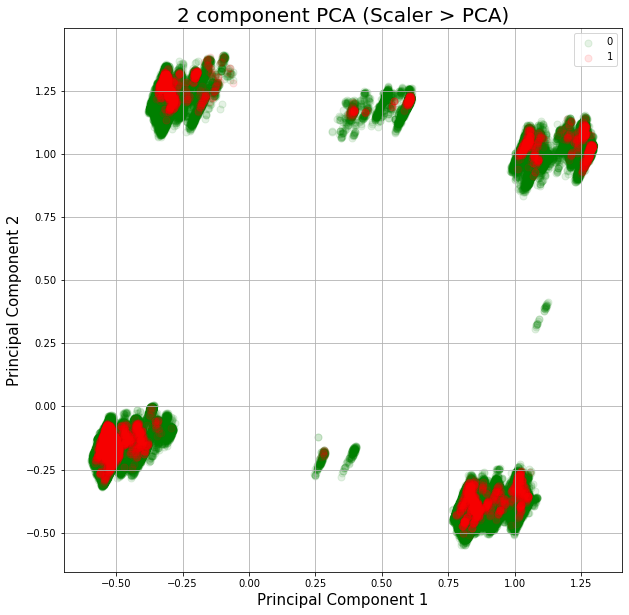

In [29]:
p_comp_df = pd.DataFrame(data = p_components,
             columns = ['pc_1', 'pc_2'])
p_df = pd.concat([p_comp_df, y.reset_index(drop=True)], axis = 1)

# Plot 2 principal components
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 

targets = [0, 1]
colors = ['g', 'r']
alphas = [.1, .1]
for target, color, alpha in zip(targets, colors, alphas):
    indices = p_df['isFraud'] == target
    ax.scatter(p_df.loc[indices, 'pc_1'], 
               p_df.loc[indices, 'pc_2'],
               c = color, s = 50, alpha=alpha)
ax.legend(targets)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA (Scaler > PCA)', fontsize = 20)
ax.grid()

plt.show()

### PCA 3D

In [30]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)

pca = PCA(n_components=3)
p_components = pca.fit_transform(X_scaled)

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[0.31978773 0.1877276  0.09049042]
[0.31978773 0.50751533 0.59800575]


In [32]:

#https://github.com/matplotlib/jupyter-matplotlib

%matplotlib widget
%matplotlib widget
# %matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


p_comp_df = pd.DataFrame(data = p_components,
             columns = ['pc_1', 'pc_2', 'pc_3'])
p_df = pd.concat([p_comp_df, y.reset_index(drop=True)], axis = 1)

fig = plt.figure(figsize = (7,7))
#ax = fig.add_subplot(1,1,1) 
ax = plt.axes(projection='3d')


targets = [0, 1]
colors = ['g', 'r']
alphas = [.05, .6]
for target, color, alpha in zip(targets, colors, alphas):
    indices = p_df['isFraud'] == target
    ax.scatter(p_df.loc[indices, 'pc_1'], 
               p_df.loc[indices, 'pc_2'],
               p_df.loc[indices, 'pc_3'],
               c = color, s = 50, alpha=alpha)
ax.legend(targets)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA (Scaler > PCA)', fontsize = 20)
ax.grid()

# ax.view_init(elev=10., azim=30)

# for angle in range(0, 360):
#     ax.view_init(30, angle)
#     plt.draw()
#     plt.pause(.001)

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Random Forest Classifier

### Baseline Model

In [36]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

model_results(X_train, y_train, X_test, y_test, rf)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy:  0.9849543319723396
AUC:  0.8270730987537905
-----
[[166012     34]
 [  2516    922]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    166046
           1       0.96      0.27      0.42      3438

    accuracy                           0.98    169484
   macro avg       0.97      0.63      0.71    169484
weighted avg       0.98      0.98      0.98    169484



### RF Tuned

In [43]:
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
    
# Parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [20, 30, None],
    'bootstrap': [True, False],
    'class_weight': [{0: 1, 1: 25}, 'balanced', 'balanced_subsample', None],
    'criterion': ['entropy', 'gini']
}

scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

rf_cv = GridSearchCV(rf, param_grid, iid=False, cv=2, n_jobs=-1)

In [44]:
rf_cv.fit(X_train, y_train)

results = rf_cv.cv_results_
results

KeyboardInterrupt: 

In [ ]:
results = rf_cv.cv_results_
results

In [ ]:
plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",
          fontsize=16)

plt.xlabel("min_samples_split")
plt.ylabel("Score")

ax = plt.gca()
ax.set_xlim(0, 402)
ax.set_ylim(0.73, 1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_min_samples_split'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()

In [ ]:

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Predict the labels of the test set
y_pred = search.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

model_results(X_train, y_train, X_test, y_test, rf)

In [33]:
rf = RandomForestClassifier(n_estimators=100, max_depth=30, criterion='entropy',
                            random_state=42, n_jobs=-1)

model_results(X_train, y_train, X_test, y_test, rf)

Accuracy:  0.9853378490004956
AUC:  0.9106900519874581
-----
[[166040      6]
 [  2479    959]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    166046
           1       0.99      0.28      0.44      3438

    accuracy                           0.99    169484
   macro avg       0.99      0.64      0.71    169484
weighted avg       0.99      0.99      0.98    169484



In [34]:
# Print "n" most important features
feature_importance = pd.DataFrame({'features':X.columns.values, 'importance':rf.feature_importances_}).sort_values('importance', ascending=False)
feature_importance.head(20).set_index('features')

,importance
features,
card1,0.062591
addr1,0.056325
TransactionAmt_log,0.053740
TransactionAmt,0.053729
card2,0.051173
D15,0.046892
D10,0.040047
Transaction_hours,0.039219
D1,0.039217


## Pipeline

### Accuracy Score

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Initiate steps
scaler = MinMaxScaler()
pca = PCA(n_components=10)
rf = RandomForestClassifier(n_estimators=100, max_depth=30, random_state=42)

# Create the pipeline
pipeline = Pipeline([('scaler', scaler),
                     ('pca', pca), 
                     ('rf', rf)])

model_results(X_train, y_train, X_test, y_test, pipeline)

Accuracy:  0.9799391092964528
AUC:  0.7222318365600477
-----
[[166019     27]
 [  3373     65]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    166046
           1       0.71      0.02      0.04      3438

    accuracy                           0.98    169484
   macro avg       0.84      0.51      0.51    169484
weighted avg       0.97      0.98      0.97    169484



In [56]:
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [2, 3, 5, 10, 25, 50]
}

search = GridSearchCV(pipeline, param_grid, iid=False, cv=3, n_jobs=-1)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Predict the labels of the test set
y_pred = search.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot the PCA spectrum
pca.fit(X_train)

Best parameter (CV score=0.983):
{'pca__n_components': 10}
[[166033     13]
 [  2710    728]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    166046
           1       0.98      0.21      0.35      3438

    accuracy                           0.98    169484
   macro avg       0.98      0.61      0.67    169484
weighted avg       0.98      0.98      0.98    169484



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

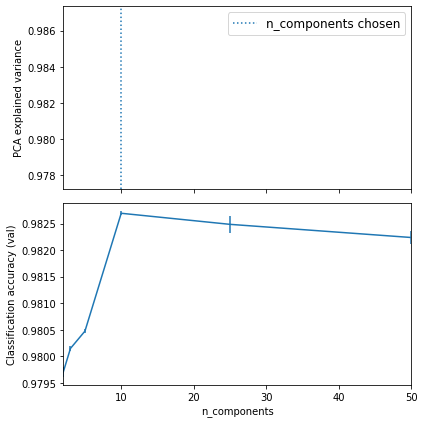

In [58]:
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(pca.explained_variance_ratio_.cumsum(), linewidth=2)
ax0.set_ylabel('PCA explained variance')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,
            linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = 'param_pca__n_components'
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, 'mean_test_score'))

best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score',
               legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')

plt.tight_layout()
plt.show()

### 

In [64]:
from sklearn.metrics import make_scorer

param_grid = {
    'pca__n_components': [2, 3, 5, 10, 20, 50],
    'rf__criterion': ['entropy', 'gini'],
    'rf__max_depth': [10, 30]
}

search = GridSearchCV(pipeline, param_grid, iid=False, cv=2, 
                      n_jobs=-1)
search.fit(X_train, y_train)


print('Grid best parameter: ', search.best_params_)
print('Grid best score: ', search.best_score_)

/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Grid best parameter:  {'pca__n_components': 10, 'rf__criterion': 'entropy', 'rf__max_depth': 30}
Grid best score:  0.9837310122889031


In [69]:
# pd.DataFrame(search.cv_results_)

In [74]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy',
                            class_weight='balanced_subsample', random_state=42, n_jobs=-1)

model_results(X_train, y_train, X_test, y_test, rf)

Accuracy:  0.9851962427131765
AUC:  0.9054513274449757
-----
[[166028     18]
 [  2491    947]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    166046
           1       0.98      0.28      0.43      3438

    accuracy                           0.99    169484
   macro avg       0.98      0.64      0.71    169484
weighted avg       0.99      0.99      0.98    169484



In [83]:
# Print "n" most important features
feature_importance = pd.DataFrame({'features':X.columns.values, 'importance':rf.feature_importances_}).sort_values('importance', ascending=False)
feature_importance.head(20).set_index('features')

,importance
features,
TransactionAmt_log,0.079117
card1,0.072237
addr1,0.063838
card2,0.059539
Transaction_hours,0.050503
D15,0.048357
C5,0.046145
D1,0.042618
D10,0.040590


## XG Boost

In [19]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(n_jobs=-1)

model_results(X_train, y_train, X_test, y_test, model_xgb)

# model_xgb.fit(train_X, train_y)
# predictions = model_xgb.predict(test_X)

Accuracy:  0.9714329257967285
AUC:  0.8672384056496898
-----
[[170727    236]
 [  4825   1374]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.99    170963
           1       0.85      0.22      0.35      6199

    accuracy                           0.97    177162
   macro avg       0.91      0.61      0.67    177162
weighted avg       0.97      0.97      0.96    177162



In [39]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(max_depth=5, random_state=42, n_jobs=-1)

model_results(X_train, y_train, X_test, y_test, model_xgb)

Accuracy:  0.9752048972127205
AUC:  0.8980379131957184
-----
[[227636    315]
 [  5542   2723]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    227951
           1       0.90      0.33      0.48      8265

    accuracy                           0.98    236216
   macro avg       0.94      0.66      0.73    236216
weighted avg       0.97      0.98      0.97    236216



In [ ]:
test['isFraud'] = model_xgb.predict_proba(test)[:,1]

### Grid Search

In [ ]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

params = {'colsample_bytree': 0.3,'n_estimators': [100, 200],
          'max_depth': [3, 5, 10], 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="auc", as_pandas=True, seed=123)

cv_results.head()

In [ ]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

### XGB Tuned 

In [20]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(alpha=4,
                         base_score=0.5,
                         booster='gbtree',
                         colsample_bylevel=1,
                         colsample_bynode=1,
                         colsample_bytree=0.9,
                         gamma=0.1,
                         learning_rate=0.1,
                         max_delta_step=0,
                         max_depth=9,
                         min_child_weight=1,
                         n_estimators=800,
                         n_jobs=2,
                         nthread=None,
                         objective='binary:logistic',
                         random_state=0,
                         reg_alpha=0,
                         reg_lambda=1,
                         scale_pos_weight=1,
                         seed=None,
                         subsample=0.9,
                         verbosity=1
    )

In [21]:
model_results(X_train, y_train, X_test, y_test, model_xgb)

Accuracy:  0.9835179101613213
AUC:  0.9602854699788881
-----
[[170712    251]
 [  2669   3530]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    170963
           1       0.93      0.57      0.71      6199

    accuracy                           0.98    177162
   macro avg       0.96      0.78      0.85    177162
weighted avg       0.98      0.98      0.98    177162



## Submission

In [22]:
test['isFraud'] = model_xgb.predict_proba(test)[:,1]
submission = test['isFraud'].reset_index()
submission.head()

,TransactionID,isFraud
0,3663549,0.000195
1,3663550,0.000073
2,3663551,0.000110
3,3663552,0.000062
4,3663553,0.000576


In [23]:
submission.to_csv('submission.csv', index=False)

## Regression

### Linear Regression

In [76]:
from sklearn.linear_model import LinearRegression

# Create a list of columns to drop
remove_list = ['isFraud', 'TransactionID', 'TransactionAmt_log']

# Create features and target
X = df.dropna().drop(remove_list, axis=1)
X = pd.get_dummies(X)
y = df.dropna().TransactionAmt_log

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=0)

# Create the regressor
reg_lin = LinearRegression()

# Fit the regressor to the training data
reg_lin.fit(X_train, y_train)

# Calculate evaluation metrics
rmse, mae, r2 = eval_metrics_reg(y_test, reg_lin.predict(X_test))
print("rmse :",rmse, ", mae: ", mae,", r2: ", r2)

rmse : 0.825465119441111 , mae:  0.6483641767248283 , r2:  0.1707578679107724


### Random Forest Regressor

In [78]:
from sklearn.ensemble import RandomForestRegressor

# Create features and target
X = df[df.isFraud==0].dropna().drop(remove_list, axis=1)
X = pd.get_dummies(X)
y = df[df.isFraud==0].dropna().TransactionAmt_log

# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=0)

reg_rf = RandomForestRegressor(random_state=57, n_estimators=100, n_jobs=-1)

reg_rf.fit(X_train, y_train)

# Calculate evaluation metrics
rmse, mae, r2 = eval_metrics_reg(y_test, reg_rf.predict(X_test))
print("rmse :",rmse, ", mae: ", mae,", r2: ", r2)

rmse : 0.7295458532145503 , mae:  0.540820371282724 , r2:  0.3445997517003341


In [80]:
# Print "n" most important features
feature_importance = pd.DataFrame({'features':X.columns.values, 'importance':reg_rf.feature_importances_}).sort_values('importance', ascending=False)
feature_importance.head(20).set_index('features')

,importance
features,
card1,0.091222
addr1,0.087325
Transaction_hours,0.078802
V130,0.076224
card2,0.061704
D15,0.061052
V99,0.055478
card6_credit,0.047456
V313,0.044789


In [10]:
# # Save to pickle, dont re-run every time you restart Notebook
# pd.to_pickle(feature_importance, 'dataset/rf_feature_importance_list.pkl')

# # Import feature importance
# feature_importance = pd.read_pickle('dataset/rf_feature_importance_list.pkl')

## Decision Tree Graph

In [105]:
import graphviz
import pydot
from sklearn.tree import DecisionTreeClassifier, export_graphviz

tree = reg_rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = X_train.columns, 
                rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree2.png')